In [1]:
# data
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown as mk, display

pd.options.mode.copy_on_write = True  # to avoid SettingWithCopyWarning, defualt on for pandas 3.0. Aka. Removes irretating warning when handeling pandas

#### Exercise 2

<Axes: >

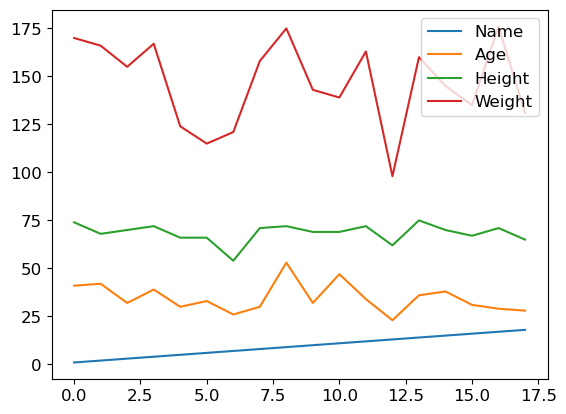

In [134]:
data = pd.read_csv("/Users/steenbender/Desktop/PhD/nanokemi/plot_i_python/example.csv")
data.plot()

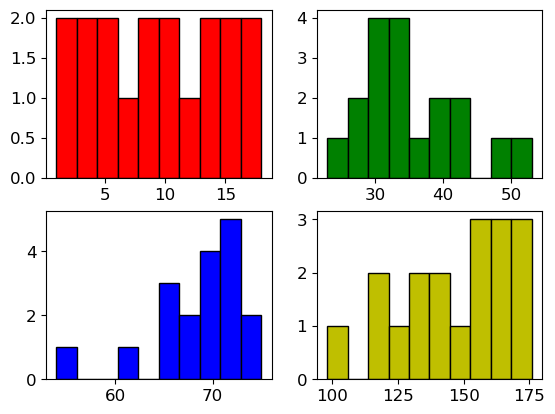

In [135]:
data_values = data[names].values
fig, ax = plt.subplots(2, 2)
ax = ax.flatten()
colors = ["r", "g", "b", "y"]
for i, dat in enumerate(data_values.T):
    ax[i].hist(dat, bins=10, color=colors[i], edgecolor="black")

<Axes: >

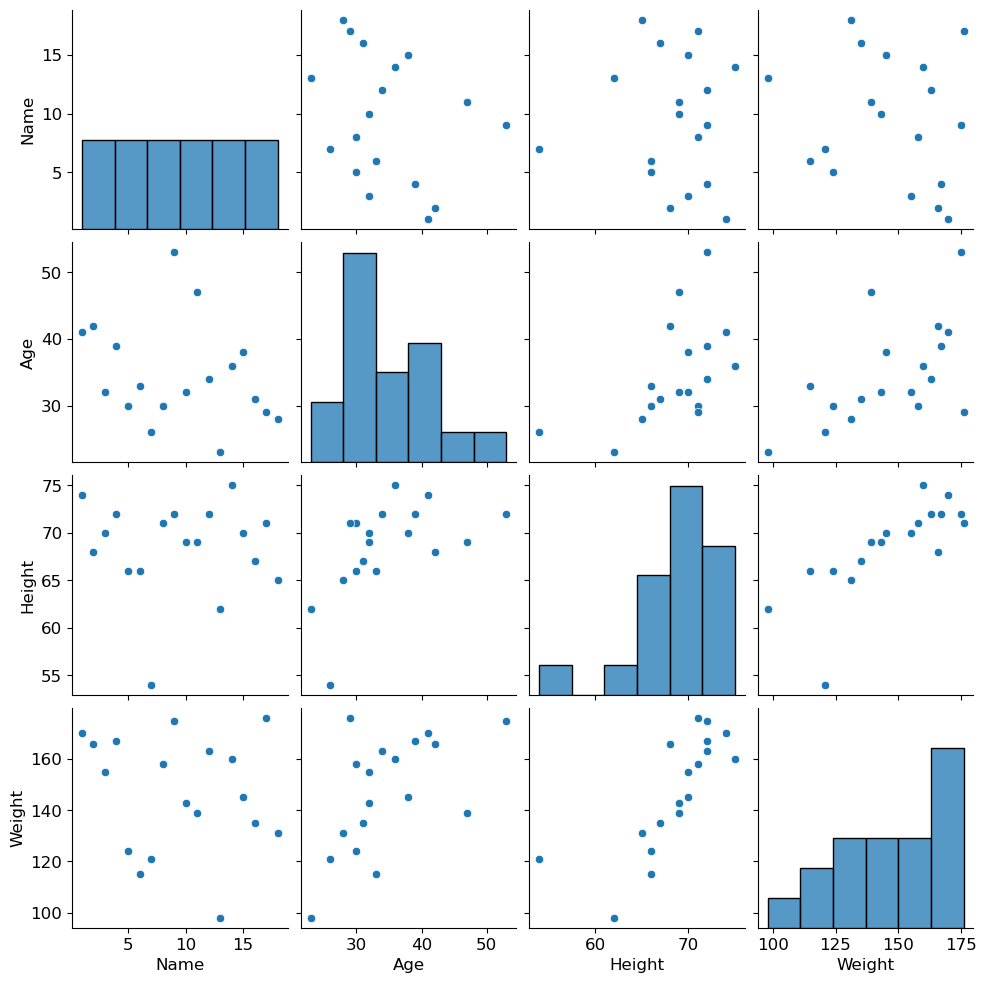

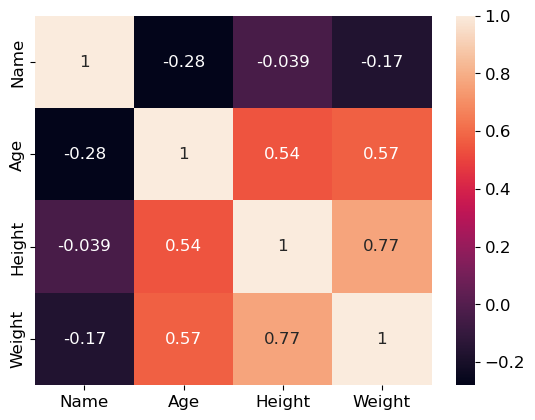

In [140]:
names = ["Name", "Age", "Height", "Weight"]
corr = data[names].corr()
sns.pairplot(data[names])
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True)


#### Exercise 3

In [126]:
data = pd.read_csv(
    "/Users/steenbender/Desktop/PhD/nanokemi/plot_i_python/example_1.csv",
    skiprows=17,
    skipfooter=9,
    engine="python",
)
data

,Name,Sex,Age,Height,Weight
0,1,M,41,74,170
1,2,M,42,68,166
2,3,M,32,70,155
3,4,M,39,72,167
4,5,F,30,66,124
5,6,F,33,66,115
6,7,F,26,54,121
7,8,M,30,71,158
8,9,M,53,72,175
9,10,M,32,69,143


#### Exercise 4

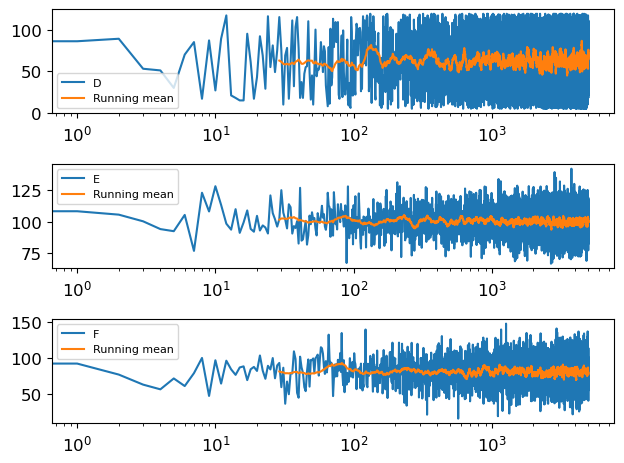

In [128]:
data = pd.read_csv(
    "/Users/steenbender/Desktop/PhD/nanokemi/plot_i_python/test_data2.csv",
    index_col=0,
    skiprows=1,
    names=["D", "E", "F"],
)
running_mean = data.rolling(window=30).mean()
fig, ax = plt.subplots(3, 1)
ax = ax.flatten()
for i, col in enumerate(data.columns):
    ax[i].plot(data[col], label=col)
    ax[i].plot(running_mean[col], label="Running mean")
    ax[i].legend(fontsize=8)
    ax[i].set_xscale("log")
fig.tight_layout()

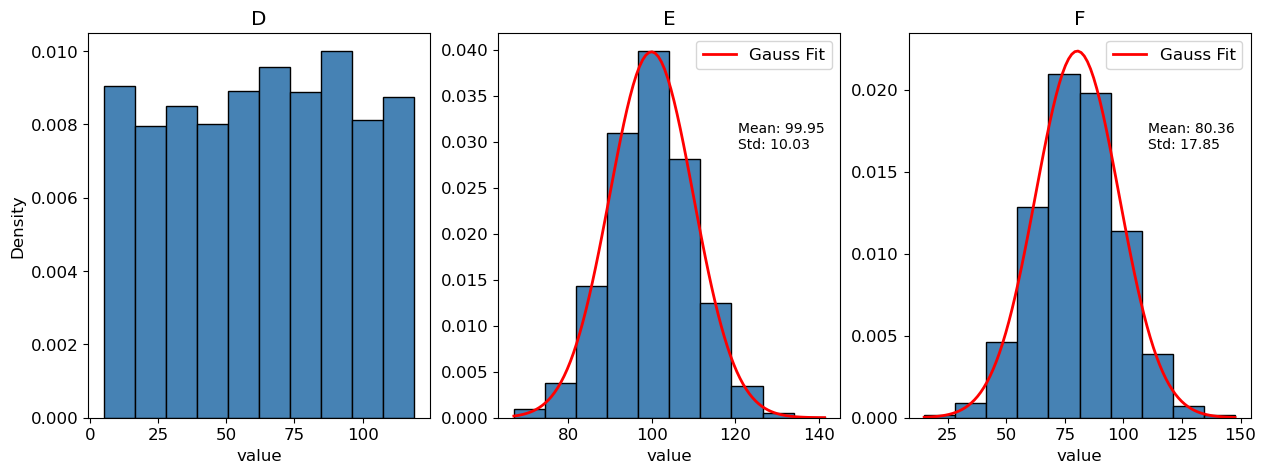

In [ ]:
# Fit a line to the data
from scipy import stats
from scipy.optimize import curve_fit


fig_hist, ax_hist = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(data.columns):
    counts, bins, _ = ax_hist[i].hist(
        data[col], bins=10, color="steelblue", edgecolor="black", density=True
    )
    if i > 0:
        x_range = np.linspace(bins.min(), bins.max(), 100)
        fit = stats.norm.pdf(x_range, np.mean(data[col]), np.std(data[col]))
        text = f"Mean: {np.mean(data[col]):.2f}\nStd: {np.std(data[col]):.2f}"
        ax_hist[i].plot(x_range, fit, label="Gauss Fit", lw=2, color="red")
        ax_hist[i].text(0.7, 0.7, text, transform=ax_hist[i].transAxes, fontsize=10)
        ax_hist[i].legend()
    else:
        ax_hist[i].set_ylabel("Density")
    ax_hist[i].set_xlabel("value")
    ax_hist[i].set_title(col)

[Text(0.5, 0, 'Values'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Histogram')]

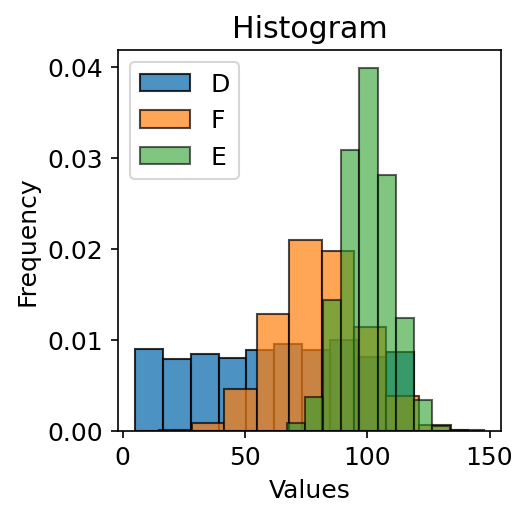

In [132]:
plt.rcParams.update({"font.size": 12})
fig, ax = plt.subplots(figsize=(3.3, 3.3), dpi=150)
ax.hist(data.D, bins=10, edgecolor="black", alpha=0.8, density=True, label="D")
ax.hist(data.F, bins=10, edgecolor="black", alpha=0.7, density=True, label="F")
ax.hist(data.E, bins=10, edgecolor="black", alpha=0.6, density=True, label="E")
ax.legend()
ax.set(xlabel="Values", ylabel="Frequency", title="Histogram")

In [ ]:
test = pd.read_csv(
    "/Users/steenbender/Desktop/PhD/nanokemi/plot_i_python/All ligands and control.txt",
    skiprows=46,
    sep="\t",
    decimal=",",
)
# test_col = test["A1"]
# split_row = test[test["A1"].isnull()]
# df_1 = test.iloc[: split_row.index[0], :]
# df_2 = test.iloc[split_row.index[0] + 2 :, :]
# df_1.loc[:, "Kinetic read"] = pd.to_timedelta(df_1["Kinetic read"]).dt.total_seconds()
# well_names = df_1.columns[1:]
# correct_values = df_1.loc[:, well_names].apply(lambda x: x.str.replace(",", "."))
# df_1.loc[:, well_names] = correct_values
# df_1 = df_1.astype(float)

In [119]:
test

,Kinetic read,A1,A2,A3,B1,B2,B3,C1,C2,C3,...,D3,E1,E2,E3,F1,F2,F3,G1,G2,G3
0,0:00:04,"0,340","0,348","0,318","0,221","0,397","0,224","0,296","0,315","0,262",...,"0,324","0,335","0,332","0,270","0,212","0,462","0,239","0,343","0,349","0,286"
1,0:00:11,"0,341","0,346","0,322","0,233","0,400","0,232","0,298","0,315","0,265",...,"0,337","0,337","0,334","0,272","0,224","0,461","0,253","0,346","0,349","0,288"
2,0:00:18,"0,343","0,345","0,324","0,242","0,402","0,241","0,299","0,315","0,266",...,"0,350","0,339","0,335","0,273","0,234","0,462","0,266","0,348","0,348","0,290"
3,0:00:25,"0,344","0,346","0,325","0,250","0,404","0,247","0,300","0,315","0,268",...,"0,362","0,341","0,336","0,274","0,242","0,463","0,275","0,350","0,348","0,292"
4,0:00:32,"0,346","0,347","0,326","0,257","0,406","0,254","0,301","0,315","0,269",...,"0,374","0,343","0,336","0,275","0,250","0,462","0,283","0,352","0,348","0,293"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,646,"0,326","0,360","0,304","0,338","0,403","0,318","0,278","0,307","0,262",...,"0,532","0,314","0,326","0,269","0,351","0,428","0,405","0,324","0,331","0,279"
201,647,"0,326","0,360","0,304","0,338","0,403","0,318","0,278","0,307","0,262",...,"0,532","0,313","0,326","0,269","0,351","0,428","0,405","0,324","0,330","0,278"
202,648,"0,325","0,360","0,303","0,338","0,403","0,318","0,278","0,306","0,262",...,"0,531","0,313","0,325","0,268","0,351","0,428","0,405","0,324","0,330","0,278"
203,649,"0,325","0,359","0,303","0,338","0,403","0,317","0,278","0,306","0,262",...,"0,531","0,313","0,325","0,268","0,351","0,427","0,404","0,323","0,330","0,278"
